# Quadratic Drag - Numerical Solution

(0.0, 45.0)

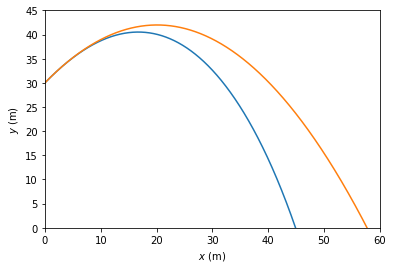

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# set some constants; we have a baseball:
m = 0.15 # kg
D = 0.07 # m
gamma = 0.25
c = gamma * D**2

h = 30 # m
g = 9.8 # m/s^2

# initial velocity
v0 = 20  # m/s
theta = 50 * np.pi/180 # in radians

# timestep
dt = 0.001
t_stop = 10 # s
t = np.arange(0, t_stop, dt)

# arrays to hold variables
N = len(t) 
x = np.zeros(N)
vx = np.zeros(N)
y = np.zeros(N)
vy = np.zeros(N)

# set initial conditions
x[0] = 0
y[0] = h
vx[0] = v0 * np.cos(theta)
vy[0] = v0 * np.sin(theta)

# start moving forward in time
for i in range(1, N):
    x[i] = x[i-1] + vx[i-1] * dt
    vx[i] = vx[i-1] - (c/m * np.sqrt(vx[i-1]**2 + vy[i-1]**2) * vx[i-1]) * dt 
    
    y[i] = y[i-1] + vy[i-1] * dt
    vy[i] = vy[i-1] - (g + c/m * np.sqrt(vx[i-1]**2 + vy[i-1]**2) * vy[i-1]) * dt

# plot up the trajectory
plt.plot(x, y)
plt.xlabel(r"$x$ (m)")
plt.ylabel(r"$y$ (m)")

# and the vacuum trajectory
plt.plot(x, y[0] + vy[0]/vx[0] * x - g * x**2 / 2 / vx[0]**2)

plt.xlim(0, 60)
plt.ylim(0, 45)